<a href="https://colab.research.google.com/github/srikanthravipati27/ml/blob/main/DL_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
data=pd.read_csv("/content/drive/MyDrive/customer_churn_dataset.csv")
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,TimeSpentInMall,VisitsPerMonth,DistanceFromHome,HasCreditCard,Churn
0,1.0,Male,NaN,NaN,90.0,17.0,12.0,22.52,No,Yes
1,2.0,Female,19.0,69522.0,98.0,214.0,NaN,21.17,Yes,Yes
2,3.0,Male,23.0,119161.0,30.0,206.0,22.0,NaN,Yes,Yes
3,4.0,Male,45.0,24886.0,NaN,207.0,25.0,18.68,No,No
4,5.0,NaN,46.0,131249.0,60.0,NaN,NaN,5.50,Yes,Yes


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        2700 non-null   float64
 1   Gender            2569 non-null   object 
 2   Age               2700 non-null   float64
 3   AnnualIncome      2700 non-null   float64
 4   SpendingScore     2700 non-null   float64
 5   TimeSpentInMall   2700 non-null   float64
 6   VisitsPerMonth    2700 non-null   float64
 7   DistanceFromHome  2700 non-null   float64
 8   HasCreditCard     2560 non-null   object 
 9   Churn             2565 non-null   object 
dtypes: float64(7), object(3)
memory usage: 234.5+ KB


In [121]:
data.isnull().sum()

,0
CustomerID,300
Gender,431
Age,300
AnnualIncome,300
SpendingScore,300
TimeSpentInMall,300
VisitsPerMonth,300
DistanceFromHome,300
HasCreditCard,440
Churn,435


In [122]:
data=data.drop('CustomerID',axis=1)

In [123]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0]);
data['Age']=data['Age'].fillna(data['Age'].mean())
data['AnnualIncome']=data['AnnualIncome'].fillna(data['AnnualIncome'].mean())
data['SpendingScore']=data['SpendingScore'].fillna(data['SpendingScore'].mean())
data['TimeSpentInMall']=data['TimeSpentInMall'].fillna(data['TimeSpentInMall'].mean())
data['VisitsPerMonth']=data['VisitsPerMonth'].fillna(data['VisitsPerMonth'].mean())
data['DistanceFromHome']=data['DistanceFromHome'].fillna(data['DistanceFromHome'].mean())
data['HasCreditCard']=data['HasCreditCard'].fillna(data['HasCreditCard'].mode()[0])
data['Churn']=data['Churn'].fillna(data['Churn'].mode()[0])

In [124]:
data['HasCreditCard']=data['HasCreditCard'].map({'Yes':1,'No':0})
data['Churn']=data['Churn'].map({'Yes':1,'No':0})


In [125]:
data=pd.get_dummies(data,columns=['Gender'])
x=data.drop('Churn',axis=1)
y=data['Churn'].values.reshape(-1,1)
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [126]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [127]:
import torch

In [128]:
x=torch.tensor(x,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)
input_dimension=x.shape[1]
output_dimension=1
weights=torch.randn(input_dimension,output_dimension,requires_grad=True)
bias=torch.randn(1,requires_grad=True)



In [129]:
epoches=100
lr=0.01
def relu(z):
  return torch.max(z,torch.tensor(0))
def BCE(y_pred,y):
  e=1e-7
  return -(y*torch.log(y_pred+e)+(1-y)*torch.log(1-y_pred+e)).mean()

In [130]:
relu_loss=[]
for i in range(epoches):
  z=x@weights+bias
  y_pred=relu(z)
  y_pred=torch.clamp(y_pred,1e-5,1-1e-5)
  loss=BCE(y_pred,y)
  loss.backward()
  with torch.no_grad():
    weights-=lr*weights.grad
    bias-=lr*bias.grad
  weights.grad.zero_()
  bias.grad.zero_()
  relu_loss.append(loss.item())
relu_loss


[5.354526996612549,
 5.350687026977539,
 5.34999942779541,
 5.347958564758301,
 5.3406596183776855,
 5.335838317871094,
 5.335155010223389,
 5.334677219390869,
 5.334383964538574,
 5.334125518798828,
 5.333889484405518,
 5.333670616149902,
 5.333466529846191,
 5.331752300262451,
 5.328402519226074,
 5.326262474060059,
 5.327590465545654,
 5.327004909515381,
 5.326687335968018,
 5.326428413391113,
 5.326200008392334,
 5.325990676879883,
 5.3257975578308105,
 5.325615882873535,
 5.325442790985107,
 5.323676586151123,
 5.318002700805664,
 5.3141069412231445,
 5.313137531280518,
 5.312718868255615,
 5.312383651733398,
 5.3120951652526855,
 5.3118414878845215,
 5.311613082885742,
 5.31140661239624,
 5.311217784881592,
 5.311042308807373,
 5.310878276824951,
 5.310724258422852,
 5.310578346252441,
 5.310439109802246,
 5.310306549072266,
 5.310178279876709,
 5.310054302215576,
 5.309934139251709,
 5.309816360473633,
 5.309701919555664,
 5.309589862823486,
 5.309479713439941,
 5.30937099456787

In [131]:
weights=torch.randn(input_dimension,output_dimension,requires_grad=True)
bias=torch.randn(1,requires_grad=True)
def sigmoid(z):
  return 1/(1+torch.exp(-z))


In [136]:
sigmoid_loss=[]
for i in range(200):
  z=x@weights+bias
  y_pred=sigmoid(z)

  loss=BCE(y_pred,y)
  loss.backward()
  with torch.no_grad():
    weights-=lr*weights.grad
    bias-=lr*bias.grad
  weights.grad.zero_()
  bias.grad.zero_()
  sigmoid_loss.append(loss.item())
sigmoid_loss


[1.2046223878860474,
 1.2033461332321167,
 1.2020714282989502,
 1.200798511505127,
 1.1995271444320679,
 1.198257565498352,
 1.1969895362854004,
 1.1957231760025024,
 1.1944584846496582,
 1.1931953430175781,
 1.1919339895248413,
 1.1906743049621582,
 1.1894161701202393,
 1.1881598234176636,
 1.186905026435852,
 1.1856520175933838,
 1.1844006776809692,
 1.1831507682800293,
 1.1819028854370117,
 1.1806563138961792,
 1.17941153049469,
 1.178168535232544,
 1.1769272089004517,
 1.1756874322891235,
 1.1744493246078491,
 1.173213005065918,
 1.17197847366333,
 1.1707452535629272,
 1.1695139408111572,
 1.1682844161987305,
 1.1670564413070679,
 1.165830135345459,
 1.1646054983139038,
 1.163382649421692,
 1.1621613502502441,
 1.1609418392181396,
 1.1597239971160889,
 1.1585079431533813,
 1.1572933197021484,
 1.1560806035995483,
 1.154869556427002,
 1.1536601781845093,
 1.1524525880813599,
 1.1512465476989746,
 1.1500422954559326,
 1.1488397121429443,
 1.1476387977600098,
 1.1464396715164185,
 1.1

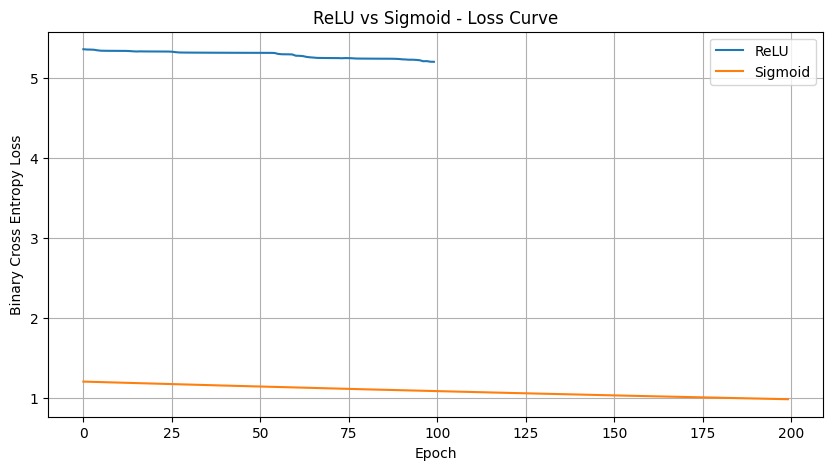

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(relu_loss, label='ReLU')
plt.plot(sigmoid_loss, label='Sigmoid')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('ReLU vs Sigmoid - Loss Curve')
plt.legend()
plt.grid()
plt.show()